# Sugarcane Data Analysis

*In this project, I conducted an in-depth analysis of the sugarcane production dataset using Python's powerful data analysis libraries: Pandas, NumPy, Seaborn, and Matplotlib. My work involved cleaning the dataset, handling missing values, and ensuring the accuracy of the data before delving into exploratory data analysis. I then created visualizations to highlight key trends, such as the relationship between land area and production output across different regions. Through statistical evaluations and visual insights, the project offers a detailed examination of the factors influencing sugarcane production globally, providing actionable insights for optimizing agricultural practices.*

*The dataset analyzed in this project comprises sugarcane production data from various continents and the countries within them. It specifically focuses on the land area utilized for sugarcane cultivation, capturing the scale of production across different regions.*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.shape

(103, 7)

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [6]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

# Cleaning

In [7]:
#we are removing dot with empty string
df["Production (Tons)"] = df["Production (Tons)"].str.replace("." ,"")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","")

In [8]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

we can see that Yield (Kg / Hectare),Acreage (Hectare) have one missing values each now we will treat them 

In [9]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df[df["Yield (Kg / Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


same position 99 we have missing values here we can directly remove the null value by drop na

In [11]:
df.dropna().reset_index()
# we will use reset funtion so that index values continues as 98,99.....

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,"43596,5"
98,98,98,Lebanon,Asia,97,16,3,"28386,4"
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,"11949,8"


here we got automacticaly two index we will remove one unnamed one

In [12]:
df = df.drop( "Unnamed: 0", axis = 1)

In [13]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,India,Asia,348448000,260721,4950000,"70393,5"
2,China,Asia,123059739,88287,1675215,"73459,1"
3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [15]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace("," ,"")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",","")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(",","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(",","")

In [16]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [17]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [18]:
df.nunique()

Country                       103
Continent                       6
Production (Tons)             103
Production per Person (Kg)    102
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

# Univariant 

In [19]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


# how many countries produce sugarcane from each continent?

In [20]:
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

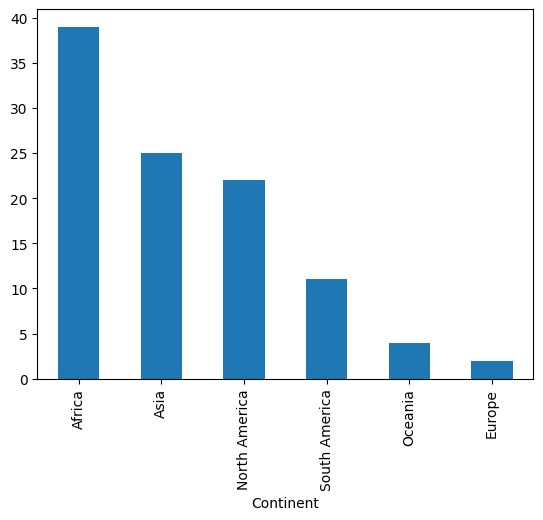

In [21]:
df["Continent"].value_counts().plot(kind = "bar")

countries from african continenet produce the most sugarcane

C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\3606373779.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\3606373779.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
C:\Users\ap

<function matplotlib.pyplot.show(close=None, block=None)>

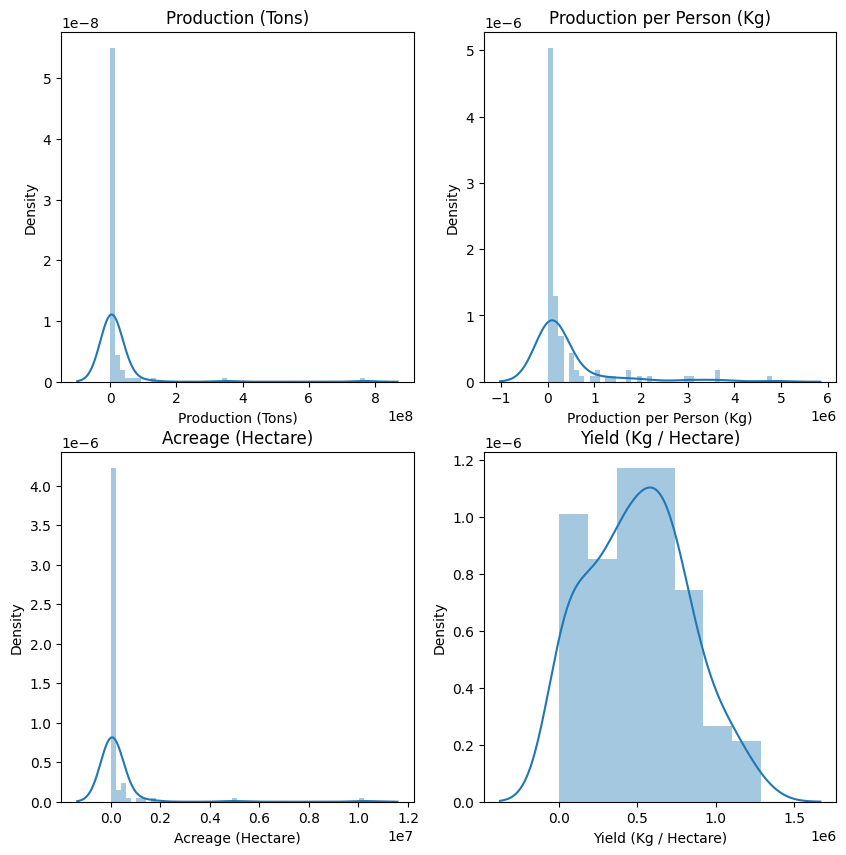

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.title("Production (Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show

<Axes: ylabel='Production (Tons)'>

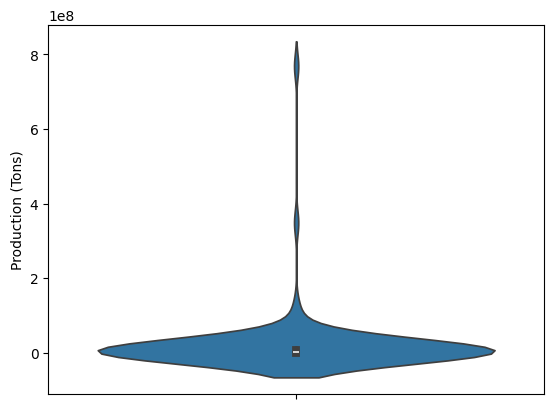

In [23]:
sns.violinplot(df["Production (Tons)"])

# Checking outliers

<function matplotlib.pyplot.show(close=None, block=None)>

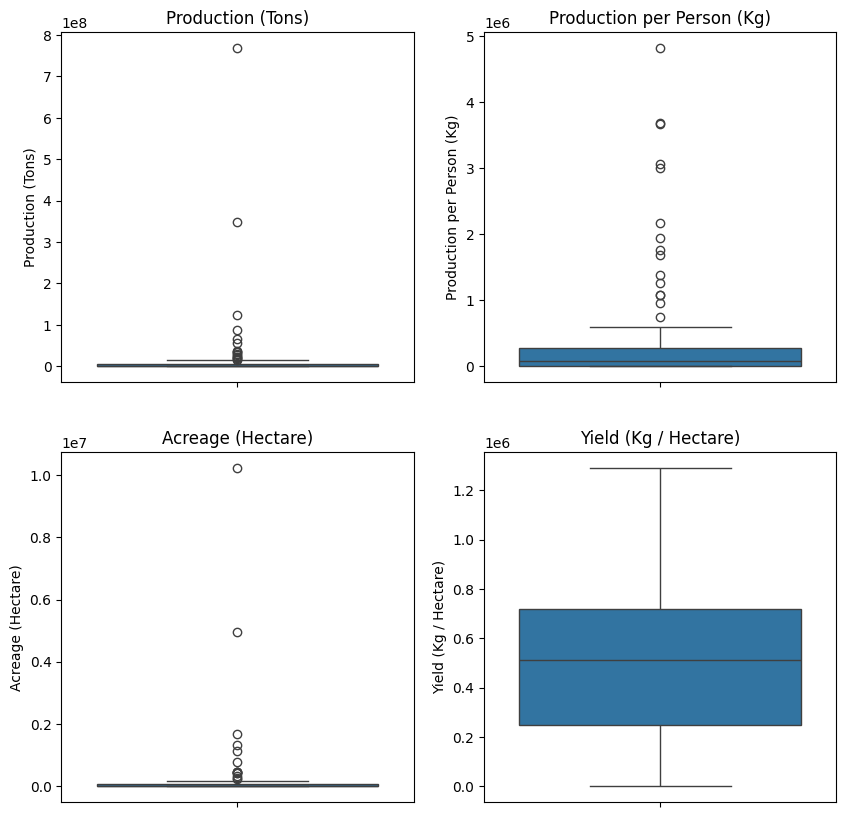

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.title("Production (Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

In [25]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.030000e+02,1.030000e+02,1.020000e+02,1.020000e+02
mean,1.832407e+07,4.084763e+05,2.498981e+05,5.018502e+05
std,8.379760e+07,8.636106e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,4.298850e+04,1.015600e+04,1.104000e+03,2.487505e+05
50%,1.422432e+06,7.960600e+04,1.655800e+04,5.102500e+05
75%,6.145648e+06,2.755895e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# Bivariate Analysis

In [26]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [27]:
df_new = df[["Country","Production (Tons)"]].set_index("Country")
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [28]:
df_new["Production (Tons)percentage"] = df_new["Production (Tons)"]*100/df_new["Production (Tons)"].sum()

In [29]:
df_new

,Production (Tons),Production (Tons)percentage
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


here we got a new column which gives us percenatge 

<Axes: ylabel='Production (Tons)percentage'>

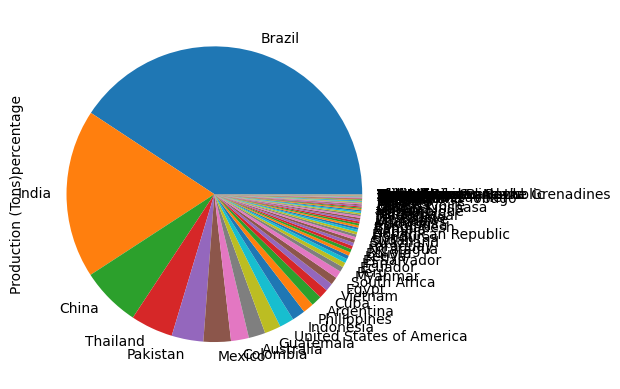

In [30]:
df_new["Production (Tons)percentage"].plot(kind = "pie")

most percentage of sugar cane is produced by brazil then india then china they together produce 60% of the world 

<Axes: xlabel='Country'>

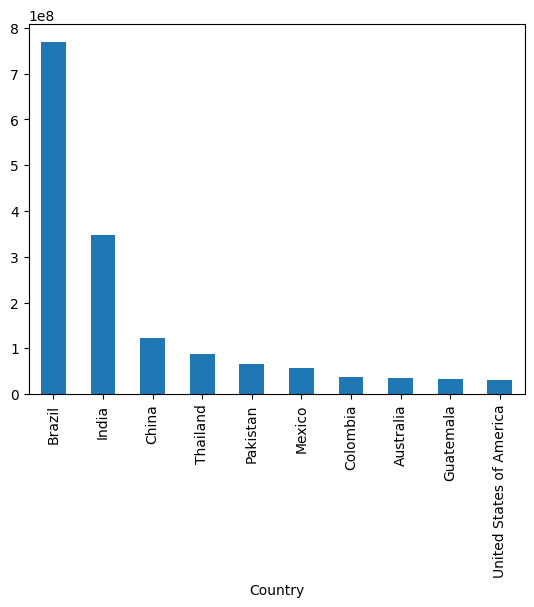

In [31]:
# head(10) gives the top 10 countries as the data and countires are in very large number
df_new["Production (Tons)"].head(10).plot(kind ="bar")

C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\3236775055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df.head(10), x ="Country", y ="Production (Tons)",palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Thailand'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Colombia'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Guatemala'),
  Text(9, 0, 'United States of America')])

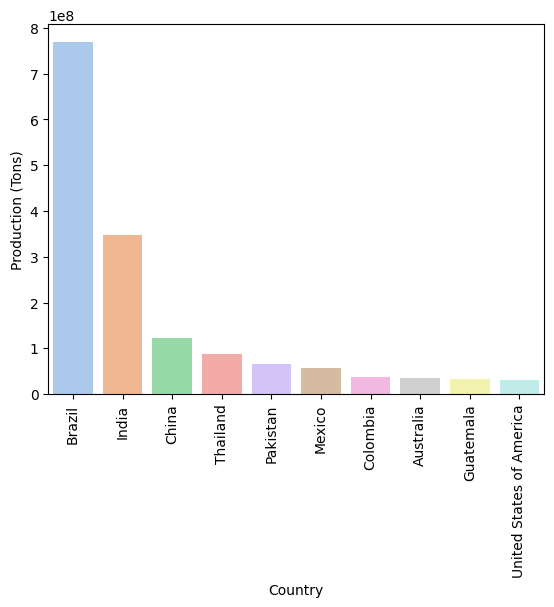

In [32]:
# we can also plot data using sns 
ax = sns.barplot(data = df.head(10), x ="Country", y ="Production (Tons)",palette = "pastel")
plt.xticks(rotation =90)

Brazil produces the maximum sugarcan

# which country have the higest land?

C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\2222269968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_acr.head(10), x ="Country", y ="Acreage (Hectare)",palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Thailand'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Indonesia'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Cuba'),
  Text(9, 0, 'Colombia')])

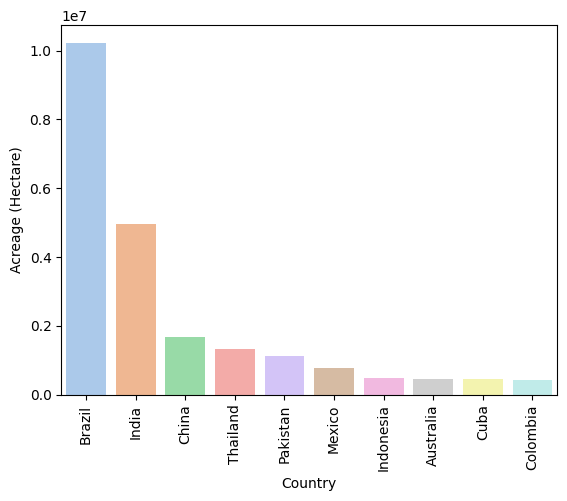

In [33]:
df_acr = df.sort_values("Acreage (Hectare)", ascending = False)
ax = sns.barplot(data = df_acr.head(10), x ="Country", y ="Acreage (Hectare)",palette = "pastel")
plt.xticks(rotation = 90)

Brazil has the higest land

# Which country has highest yield per hectare?

C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\3614551340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_yield.head(10), x ="Country", y = "Yield (Kg / Hectare)",palette="dark")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Guatemala'),
  Text(1, 0, 'Senegal'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'Peru'),
  Text(4, 0, 'Malawi'),
  Text(5, 0, 'Chad'),
  Text(6, 0, 'Zambia'),
  Text(7, 0, 'Burkina Faso'),
  Text(8, 0, 'Swaziland'),
  Text(9, 0, 'Nicaragua')])

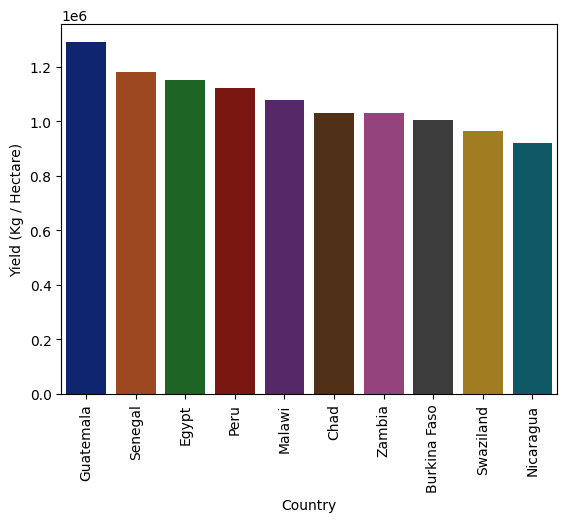

In [34]:
df_yield = df.sort_values("Yield (Kg / Hectare)",ascending = False)
sns.barplot(data=df_yield.head(10), x ="Country", y = "Yield (Kg / Hectare)",palette="dark")
plt.xticks(rotation = 90)

here we can see that Guatemala has the higest yield per hectare/kg

# Which country has highest production?

C:\Users\apoor\AppData\Local\Temp\ipykernel_11460\3428599309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_production.head(10),x ="Country",y= "Production (Tons)",palette ="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Thailand'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Colombia'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Guatemala'),
  Text(9, 0, 'United States of America')])

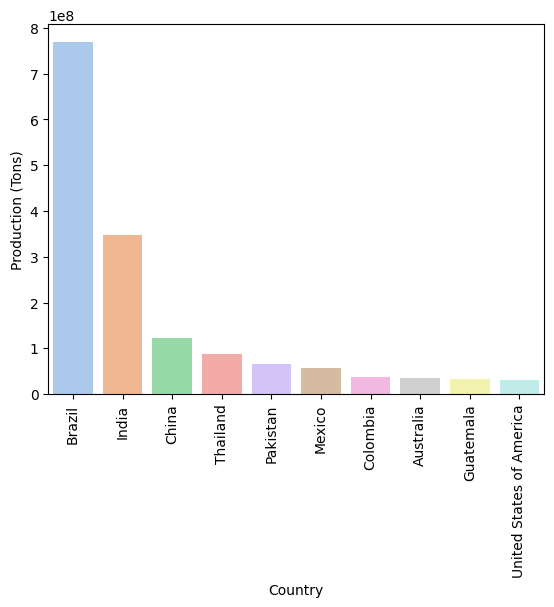

In [35]:
df_production = df.sort_values("Production (Tons)",ascending = False)
sns.barplot(data=df_production.head(10),x ="Country",y= "Production (Tons)",palette ="pastel")
plt.xticks(rotation=90)

brazil has highest production

In [36]:
df.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

# Corelation

In [37]:
numerical_df=df.select_dtypes(include=['number'])

In [38]:
numerical_df.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.352920,0.997550,0.121125
Production per Person (Kg),0.352920,1.000000,0.341974,0.226719
Acreage (Hectare),0.997550,0.341974,1.000000,0.107826
Yield (Kg / Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

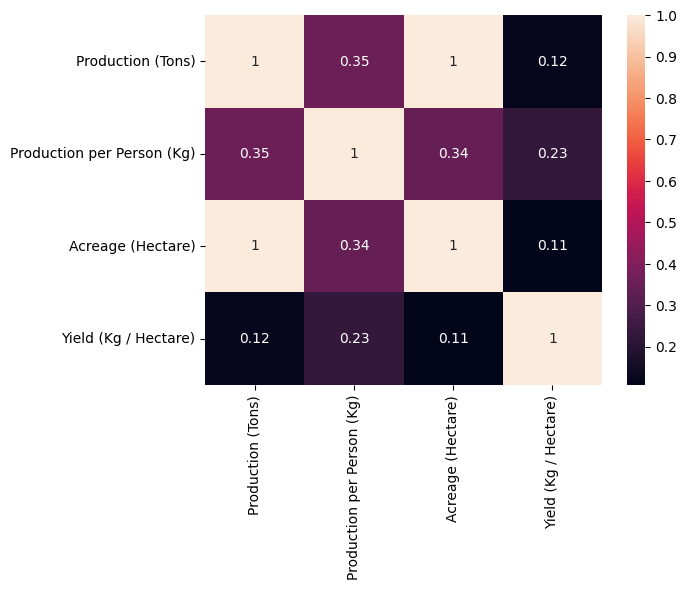

In [39]:
sns.heatmap(annot=True,data=numerical_df.corr())

# Do countries with highest land produce more sugarcane?

we can see that from heatmap or scatter plot both

In [40]:
df.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

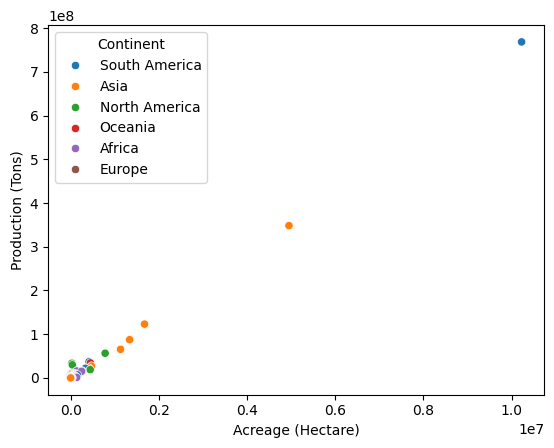

In [41]:
sns.scatterplot(data=df,x="Acreage (Hectare)",y="Production (Tons)", hue = "Continent")

by this scatterplot we can conclude that more land = more production

<Axes: >

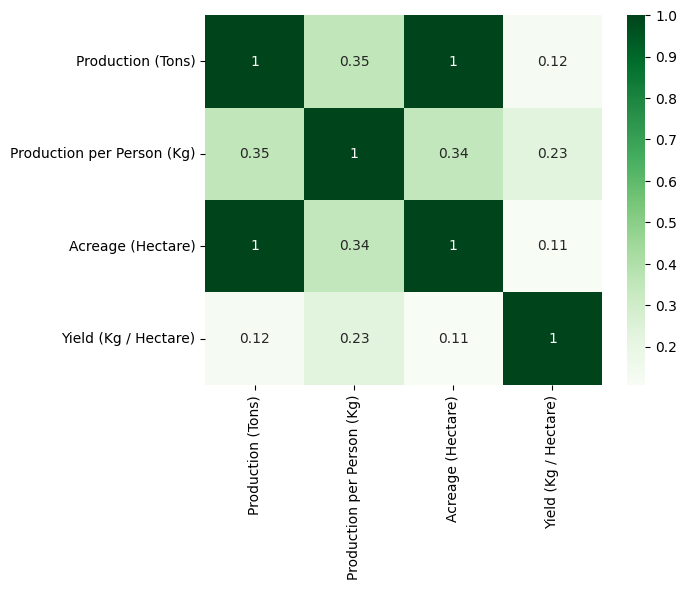

In [42]:
sns.heatmap(annot=True,data=numerical_df.corr(), cmap="Greens")

here we can see the strong co-relation between area and production so we can say yes land and production are related and dependent

# Do countries which yield more sugarcane per hectare produces more sugarcane in total?

we can check it through scatterplot

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

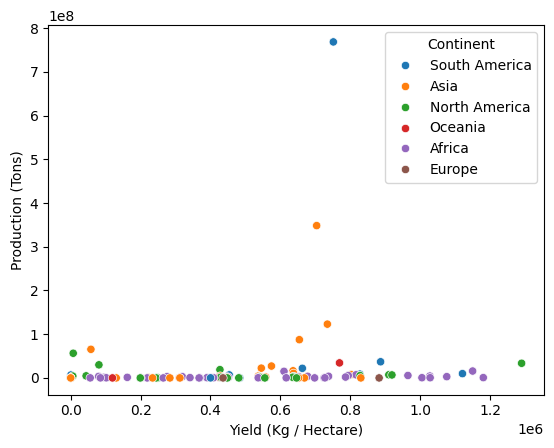

In [43]:
sns.scatterplot(data=df,x='Yield (Kg / Hectare)',y='Production (Tons)',hue= "Continent")

no countries which yield more sugarcane per hectare do not produces more sugarcane in total

# Analysis for Continent

In [44]:
df_continent=df.groupby("Continent").sum()

In [45]:
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,10144161.0,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0


In [46]:
#Number of countries a continent have
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

# Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

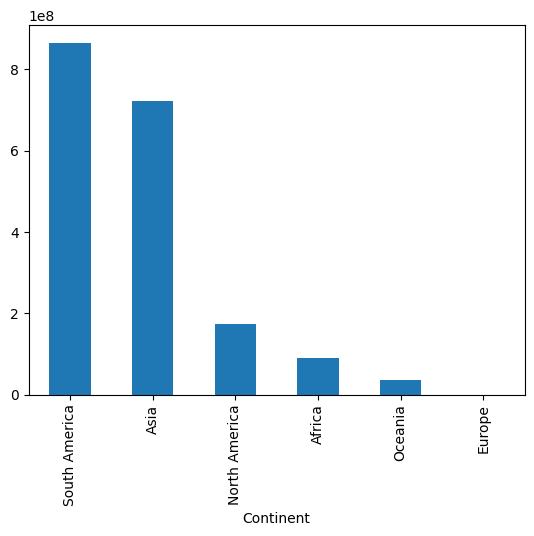

In [68]:
df_continent["Production (Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

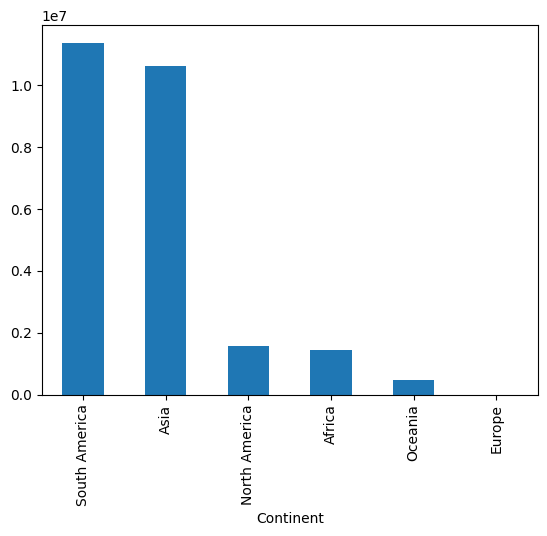

In [48]:
#to check which continent have higest land
df_continent["Acreage (Hectare)"].sort_values(ascending=False).plot(kind="bar")

we can see that South America has both higest land and higest production too

# Do number of countries in a Continent effects production of sugarcane?

In [49]:
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

here we can see that South America has less countries but still have the higest production so number of countries do not matter but land does

#we give count of each number by .value count of the continent column
df_continent["number_of_countries"]=df["Continent"].value_counts()

In [50]:
df_continent["number_of_countries"]= df.groupby("Continent").count()["Country"]



#we can also use this line of code too

In [51]:
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,10144161.0,1439089.0,20700454.0,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0,25
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0,11


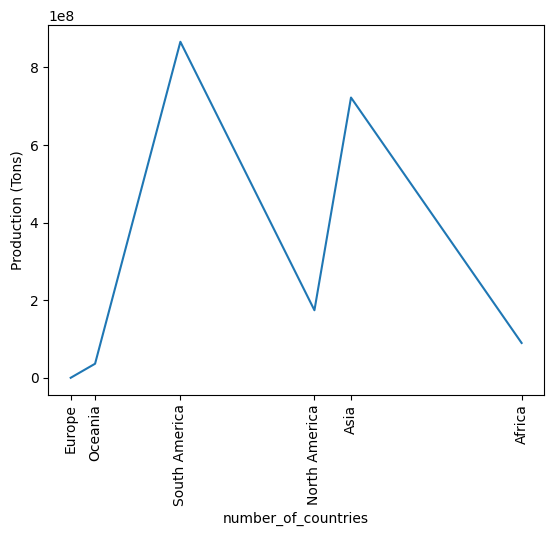

In [65]:
continent_name = df_continent.index.to_list()
sns.lineplot(data=df_continent,x="number_of_countries",y="Production (Tons)")
plt.xticks( df_continent["number_of_countries"],continent_name, rotation =90)
plt.show()

no number of countries in a Continent effects production of sugarcane

In [55]:
df.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

# Production distribution by continent

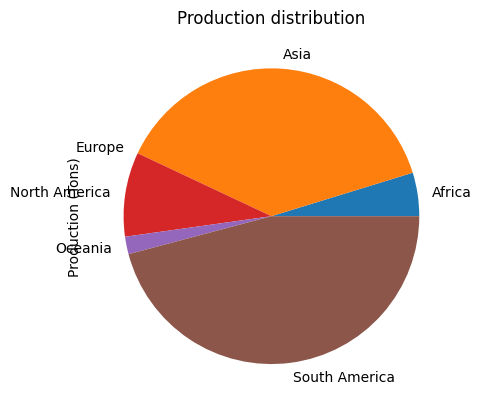

In [56]:
df_continent["Production (Tons)"].plot(kind="pie")
plt.title("Production distribution")
plt.show()

# Correlation for continent

In [57]:
df_continent_numeric = df.select_dtypes(include=['number'])

In [58]:
df_continent_numeric.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.352920,0.997550,0.121125
Production per Person (Kg),0.352920,1.000000,0.341974,0.226719
Acreage (Hectare),0.997550,0.341974,1.000000,0.107826
Yield (Kg / Hectare),0.121125,0.226719,0.107826,1.000000


# Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

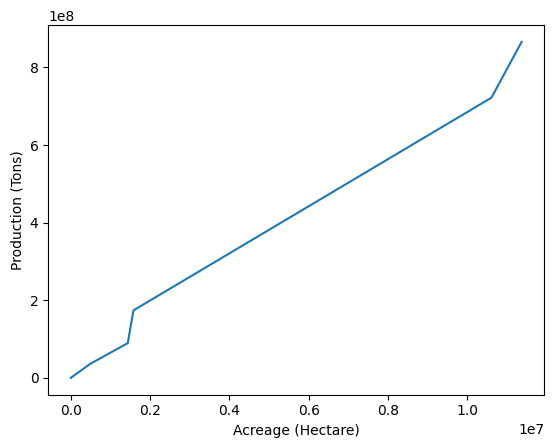

In [71]:
df_conti= df_continent.sort_values("Production (Tons)",ascending=False)
sns.lineplot(data = df_conti,x = "Acreage (Hectare)", y= "Production (Tons)")

yes continent with highest land produces more sugarcane